## Observations and Insights 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_number = len(merge_df["Mouse ID"].unique())
mice_number

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
replicate_mouse = merge_df[ merge_df['Mouse ID'] == 'g989' ].index
merge_df.drop(replicate_mouse , inplace=True)

In [8]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(merge_df["Mouse ID"].unique())
mice_number

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = merge_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = summary_stats["Tumor Volume (mm3)"].mean()
median = summary_stats["Tumor Volume (mm3)"].median()
variance = summary_stats["Tumor Volume (mm3)"].var()
std = summary_stats["Tumor Volume (mm3)"].std()
sem = summary_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame({"Mean of the tumor volume": mean,
                                           "Median of the tumor volume": median,
                                           "Variance of the tumor volume": variance,
                                           "Standard deviation of the tumor volume": std,
                                           "SEM of the tumor volume": sem})

summary_statistics

,Mean of the tumor volume,Median of the tumor volume,Variance of the tumor volume,Standard deviation of the tumor volume,SEM of the tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merge_df.groupby('Drug Regimen')
summary_stats.agg(tumor_volume_mean=('Tumor Volume (mm3)', np.mean), tumor_volume_median=('Tumor Volume (mm3)', np.median), tumor_volume_variance=('Tumor Volume (mm3)', np.var), tumor_volume_STD=('Tumor Volume (mm3)', np.std), tumor_volume_SEM=('Tumor Volume (mm3)', st.sem))


,tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_STD,tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

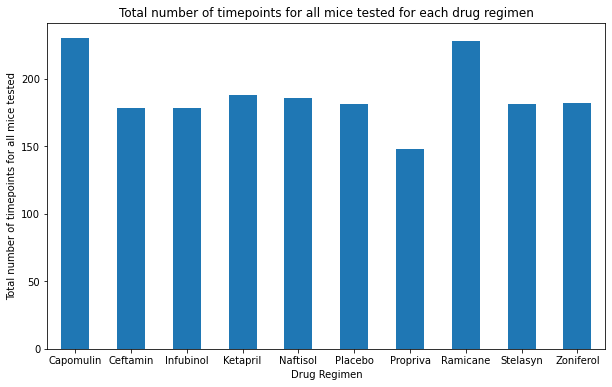

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_1 = merge_df.groupby('Drug Regimen')
total_timepoints = Bar_1['Timepoint'].count()
Bar_1 = total_timepoints.plot(kind='bar',figsize=(10,6))

Bar_1.set_ylabel("Total number of timepoints for all mice tested")
plt.xticks(rotation=360)
plt.title("Total number of timepoints for all mice tested for each drug regimen")


Text(0, 0.5, 'Total number of timepoints for all mice tested')

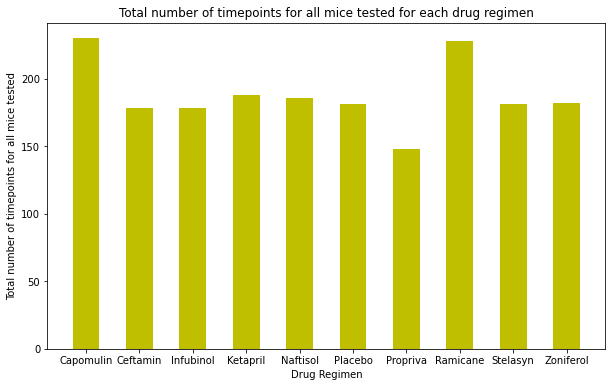

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Bar_2 = merge_df.groupby('Drug Regimen')
drug_regimen = Bar_2['Drug Regimen'].unique()
x_axis = np.arange(len(drug_regimen))
total_timepoints = Bar_2['Timepoint'].count()

plt.figure(figsize=(10,6))
plt.bar(x_axis, total_timepoints, color="y", align="center", width=.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])

plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints for all mice tested")



Text(0.5, 1.0, 'The distribution of female versus male mice in this study')

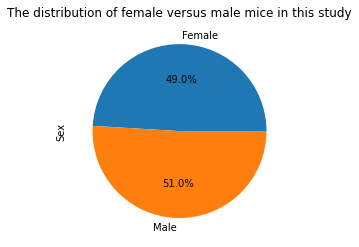

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_1 = merge_df.groupby('Sex')
female_male = pie_1["Sex"].count()
female_male.plot(kind='pie',autopct="%1.1f%%")

plt.title("The distribution of female versus male mice in this study")

Text(0.5, 1.0, 'The distribution of female versus male mice in this study')

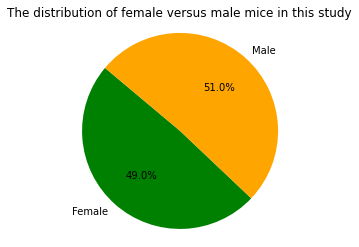

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_2 = merge_df.groupby('Sex')

female_male = pie_2["Sex"].count()

sex = ["Female", "Male"]
colors = ["green", "orange"]
explode = (0,0)
plt.pie(female_male, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140) 

plt.axis("equal")
plt.title("The distribution of female versus male mice in this study")

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merge_df.groupby("Mouse ID")["Timepoint"].max()

last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint_merge = pd.merge(last_timepoint,merge_df, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [172]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for drug in drug_regimen:
    tumor = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor)
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
    print("----------------------------------------")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers = (tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]).count()
    
    print(f'{drug} has {outliers} outliers')

  

    

----------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has 0 outliers
----------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has 0 outliers
----------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outl

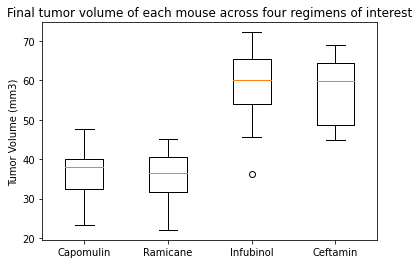

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor volume vs. Timepoint for mouse s185 treated with Capomulin')

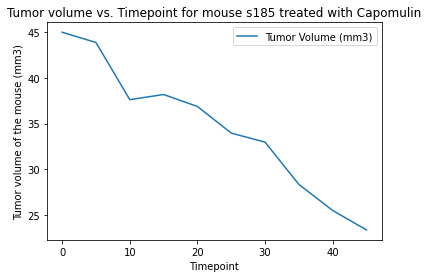

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]

one_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185", :]

one_mouse.plot('Timepoint', 'Tumor Volume (mm3)')

plt.ylabel("Tumor volume of the mouse (mm3)")
plt.title("Tumor volume vs. Timepoint for mouse s185 treated with Capomulin")

Text(0.5, 1.0, 'Average tumor volume vs. mouse weight for the Capomulin regimen')

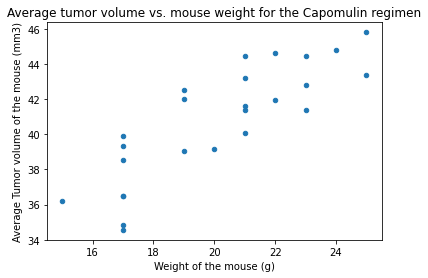

In [146]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]

mouse_ID = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_ID = mouse_ID.reset_index()

mouse_ID_merge = pd.merge(capomulin,mouse_ID, on=["Mouse ID"])

mouse_ID_merge = mouse_ID_merge.drop_duplicates(subset=['Mouse ID'])

mouse_ID_merge.plot(kind= "scatter", y = "Tumor Volume (mm3)_y", x= "Weight (g)" )


plt.ylabel("Average Tumor volume of the mouse (mm3)")
plt.xlabel("Weight of the mouse (g)")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")

## Correlation and Regression

In [147]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_ID_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.0,0,34.559143
10,x401,Capomulin,Female,16,15,0,45.0,0,36.182040
20,m601,Capomulin,Male,22,17,0,45.0,0,34.847470
30,f966,Capomulin,Male,16,17,0,45.0,0,36.505973
35,u364,Capomulin,Male,18,17,0,45.0,0,39.887495


In [155]:
#correlation coefficient
weight = mouse_ID_merge.iloc[:,4]
average_tumor = mouse_ID_merge.iloc[:,8]

correlation = st.pearsonr(weight,average_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


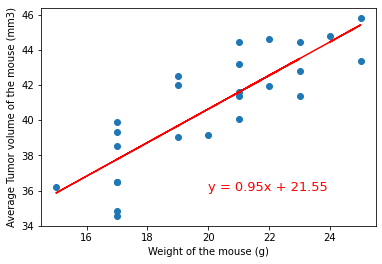

In [152]:
#linear regression model
x_values = mouse_ID_merge['Weight (g)']
y_values = mouse_ID_merge['Tumor Volume (mm3)_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=13,color="red")
plt.xlabel('Weight of the mouse (g)')
plt.ylabel('Average Tumor volume of the mouse (mm3)')
plt.show()